# Credit Card Fraud Analysis Machine Learning

#### By: Xavien Aguigui


<div>
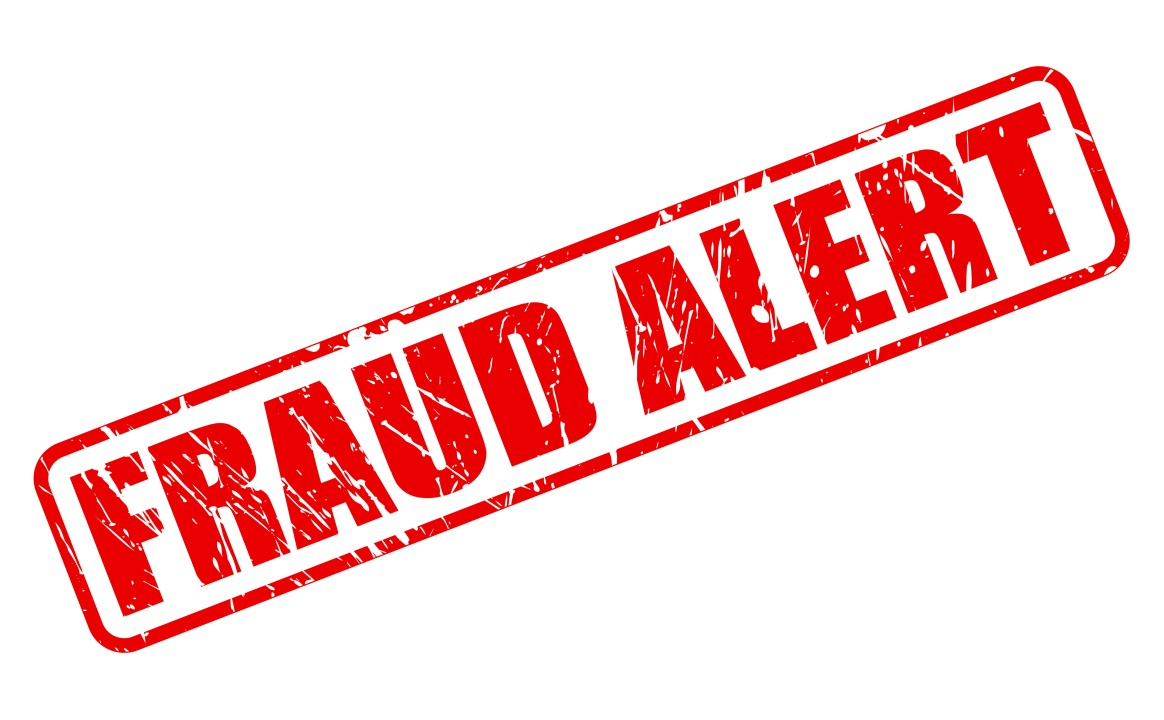
</div>

## Introduction

With credit card fraud being the most common type of identity theft through the first three quarters of 2023, my aim to use various predictive models to identify and prevent fraudulent transactions. This dataset contains credit card transactions from European cardholders in 2023 which is compromised of **over 550,000 anonymous records** in order to protect cardholders' identities. 

## Goal and Business Use

 Given this [dataset](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data) from Kaggle, the task is to take this data, split into train and testing categories, and predict fraudulent transactions based on anonymized features of transaction attributes **(e.g. time, location, etc)**. 

In [106]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import xgboost as xgb
import scipy.stats as stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# Suppress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Packages used and brief Introduction to Supervised Learning
Aside from the main data analysis packages **(e.g. Pandas, NumPy, matplotlib, seaborn, etc)** , I would like to dive deeper into the machine learning packages used in this project. As an important note, I used different packages to gain more familiarity with different machine learning models to see how their performance compares to one another and in the process, enhance my knowledge in this field. All of the models used are considered supervised learning algorithms where they require specific labelling on a percentage of the dataset in order to train the predictive model.  Some of the models with the descriptions are noted below:

#### Supervised Learning Packages
- **Logistic Regression** -
 A binary or multinomial classification algorithm used to properly bucket datapoints within a given "class" or "label" if it hits given thresholds respective each of the classes/labels. After setting the parameters it then takes forecasted values and buckets them in the same way as mentioned above. 

- **Decision Tree** - 
A non-parametric supervised learning method used for classification (our case) and regression. The goal for this model is to create a model that predicts the value of a target variable by learning simple decision rules inferred from data features. This emobodies a flow-like structure, where each internal node denotes a test on an attribute, each branch representing the outcome of a test, and each leaf node holds a class.

- **Random Forest** - 
This method is built off of the previous model where it uses multiple decision trees that serve as branches that follow true-false statements. After a prediction is made, the algorithm runs through each of the text and counts the number of trees that predict each class.

- **XG Boost using RandomizedSearch** -
A supervised learning algorithm that belongs to the gradient boosting framework using decision trees(usually) as the base learners (in an iterative manner) and employs regularization techniques to enhance the model generalization. Essentially, the ensemble of the decision trees have a specific focus on correcting errors made by existing ones and uses gradient descent optimization to minimize a predefined loss function during training. 


### Data Acquisition and Description

In [107]:
# load the dataset
df = pd.read_csv('creditcard_2023.csv')

In [108]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [109]:
df.shape

(568630, 31)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [111]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [112]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-1.109271e-14,-3.429498e-14,-1.209242e-14,3.825991e-15,6.288281e-15,-2.751174e-14,1.240002e-14,8.208047e-15,-1.002980e-14,...,2.210679e-15,-8.767441e-16,4.376179e-16,6.825608e-16,2.545689e-15,1.781906e-15,2.817586e-15,2.891419e-15,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [113]:
df.duplicated().sum()

0

### Data visualization
**Bar plot** - meant to display a relative frequencies of the classes (Fraudulent , Non-Fraudulent) of the data before developing the model. 

**Heat map** - checking the relation of each anonymized feature to get a broad understanding of potential importance

**Box plot** - used to check any potential outliers in the data

**Histogram dashboard (important features)** - taking note of the main correlations extracted from the heat map to observe seperate features in a closer scope

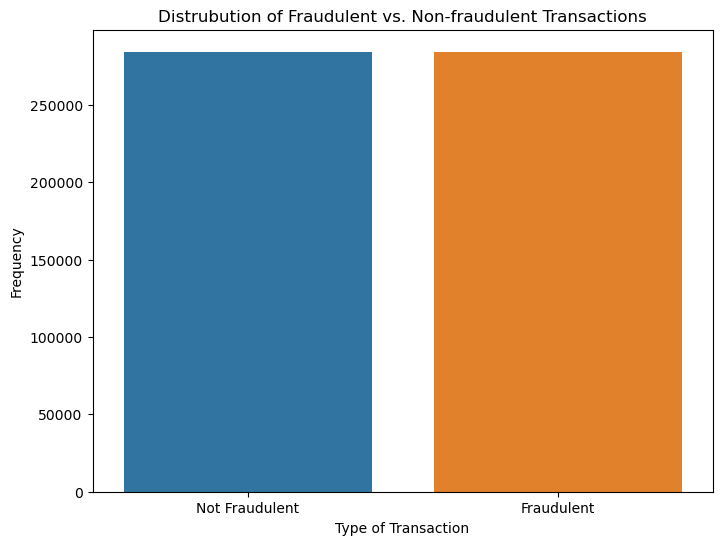

In [158]:
plt.figure(figsize = (8, 6)) # setting the appropriate width and height for the graph
sns.countplot(data = df, x = 'Class')
plt.title('Distrubution of Fraudulent vs. Non-fraudulent Transactions')
plt.xlabel('Type of Transaction')
plt.xticks([0,1],['Not Fraudulent','Fraudulent'])
plt.ylabel('Frequency')
plt.show()




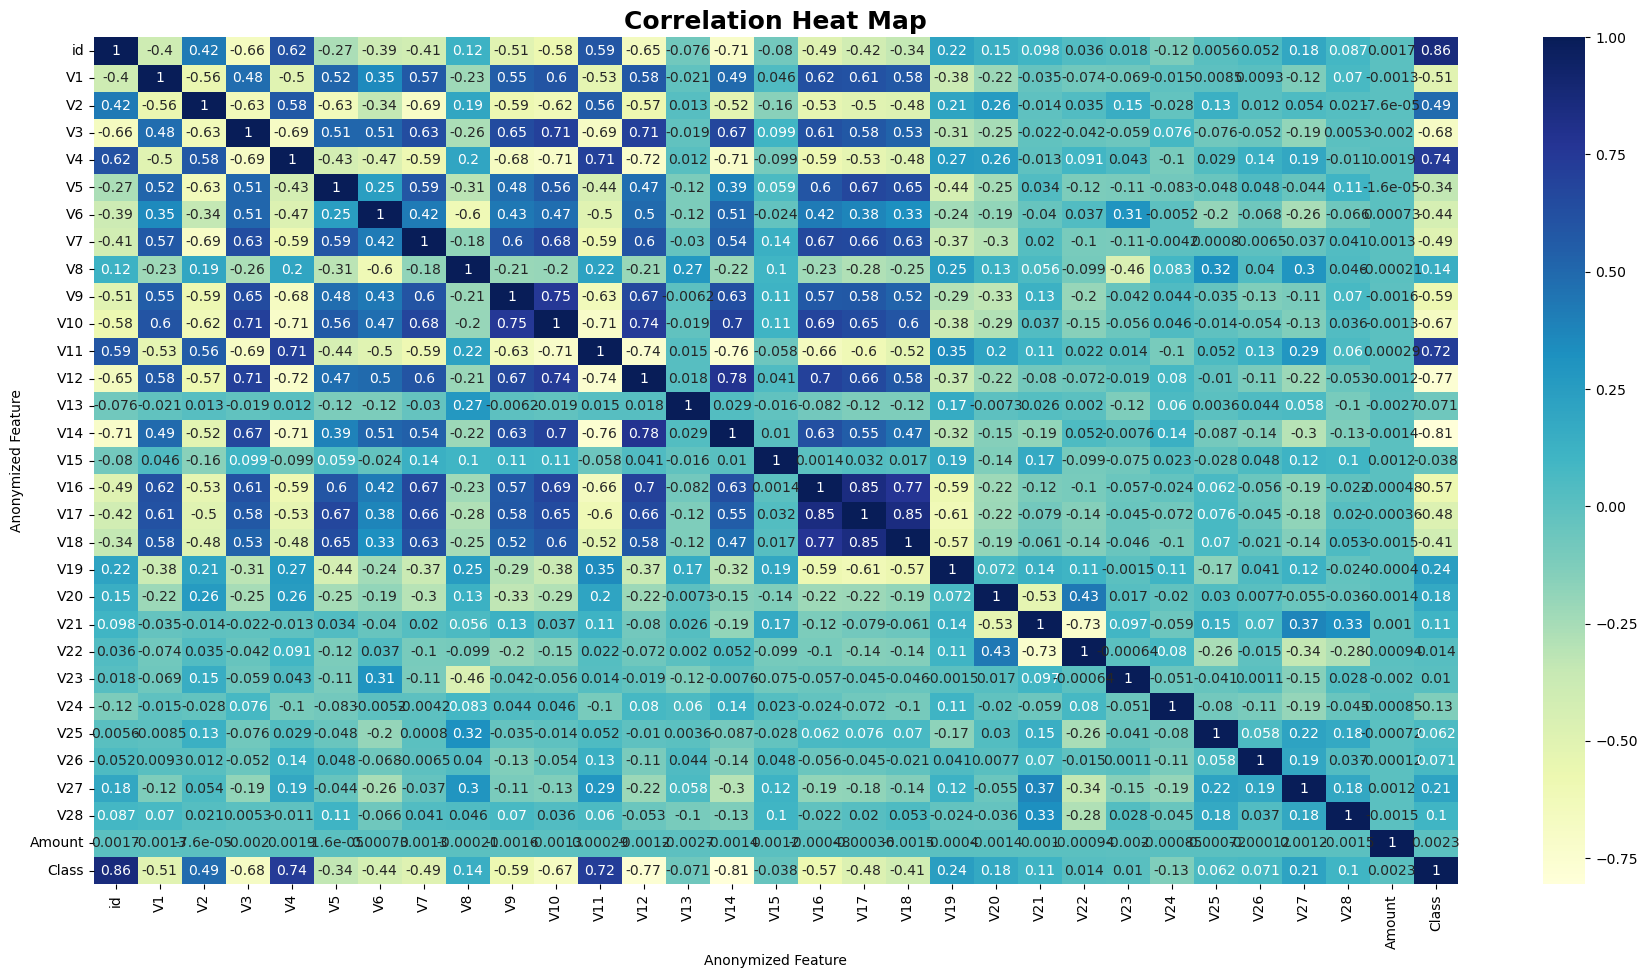

In [115]:
# Creating a heat map to present how each anonymized factor corresponds to one another
plt.figure(figsize = (22,11))
sns.heatmap(df.corr(),cmap = 'YlGnBu', annot = True)
plt.title('Correlation Heat Map', fontsize = 18, weight = 'bold')
plt.xlabel('Anonymized Feature')
plt.ylabel('Anonymized Feature')
plt.show()

Text(0.5, 1.0, 'Amount Distribution')

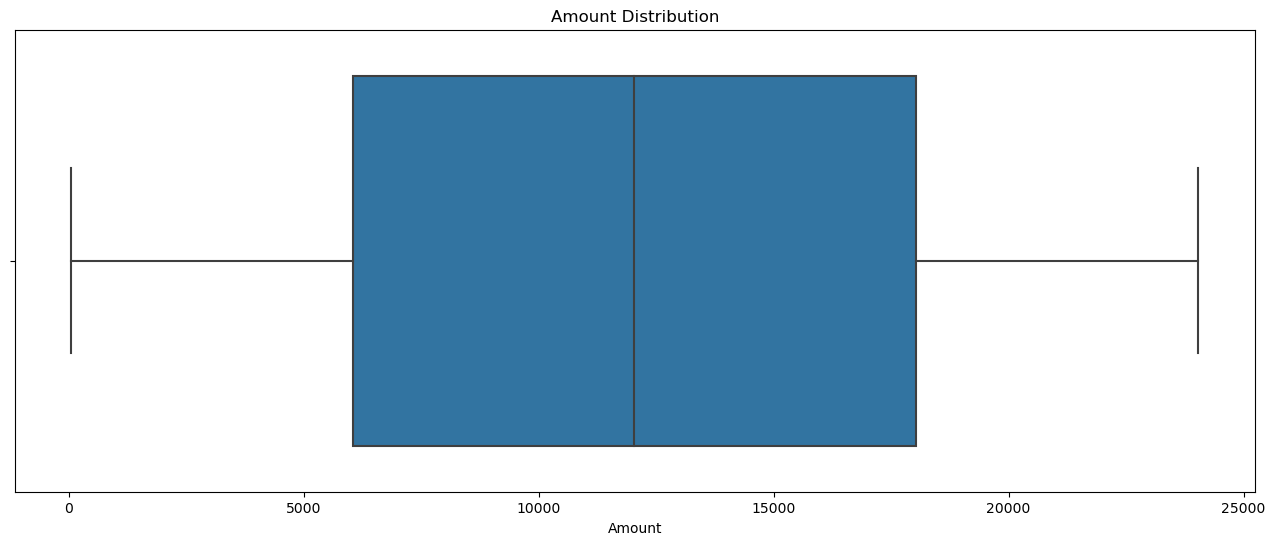

In [159]:
plt.figure(figsize = (16,6))
sns.boxplot(data = df, x = 'Amount')
plt.title('Amount Distribution')

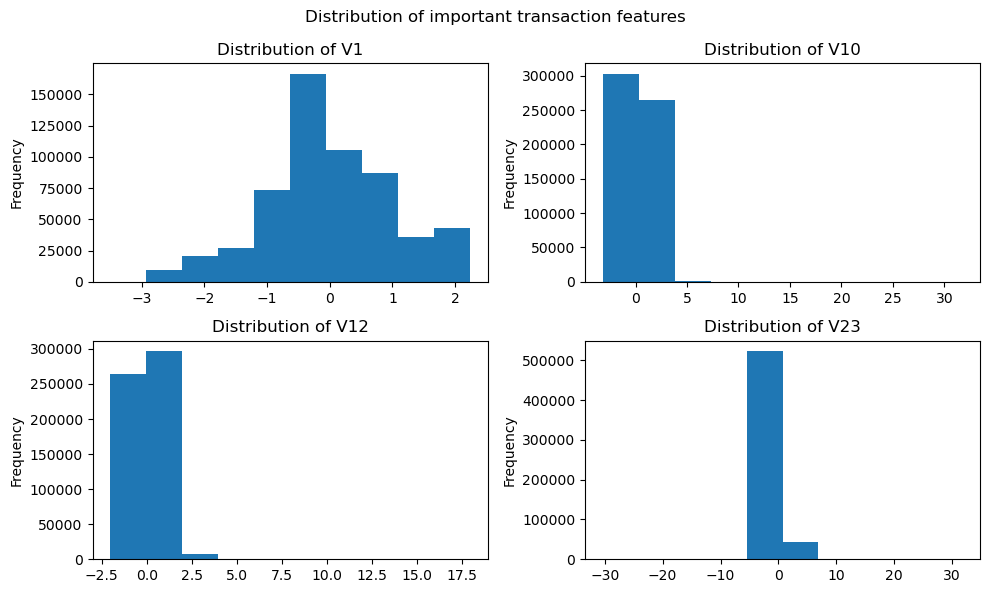

In [117]:
# creating a dashboard setting in a 2x2 fashion to display the 4 histograms 
figure, ax = plt.subplots(2, 2, figsize = (10,6))
df['V1'].plot(kind = 'hist', ax = ax[0,0], title = 'Distribution of V1')
df['V10'].plot(kind = 'hist', ax = ax[0,1], title = 'Distribution of V10')
df['V12'].plot(kind = 'hist', ax = ax[1,0], title = 'Distribution of V12')
df['V23'].plot(kind = 'hist', ax = ax[1,1], title = 'Distribution of V23')
plt.suptitle('Distribution of important transaction features')
plt.tight_layout()
plt.show()


### Data Preprocessing
Since there are no duplicates, outliers, or null-values majority, if not all, of the cleaning has been done in the dataset. All there is left to do is to drop the class and id columns in order to isolate the anonymized transaction features. After that, we must standarize (scale) our data so that certain features don't dominate others due to their magnitudes

In [118]:
x = df.drop(['id','Class'], axis = 1) # axis = 1 means to drop by col
y = df.Class # creating a new df for the class col

In [119]:
x.head() # checking to see if the columns were dropped in the new df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [120]:
print('Shape of x:',x.shape)
print('Shape of y:', y.shape)

Shape of x: (568630, 29)
Shape of y: (568630,)


In [121]:
scl = StandardScaler().fit(x)

In [122]:
x_scaled = scl.transform(x) 

In [123]:
x_scaled_df = pd.DataFrame(x_scaled,columns = x.columns)

In [124]:
x_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


### Logistic Regression
(background info here)

In [125]:
# splitting the data into 75% training and 25% testing, stratify y is used to preserve the proportion in the way the 
# data is being distributed so that the training set is representative of the original data
x_train,x_test, y_train, y_test = train_test_split(x_scaled_df,y,test_size = 0.25, random_state = 42, stratify = y)

In [126]:
# checking the shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426472, 29)
(142158, 29)
(426472,)
(142158,)


In [127]:
# applying the regression and fitting it appropriately to the training set 
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

### Defining a function to check Model Accuracy, Classification Report and Confusion Matrix

In [128]:
def model_eval(actual,predicted):
    acc_score = accuracy_score(actual,predicted)
    con_matrix = confusion_matrix(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print('Model Accuracy is: ', round(acc_score,4)) #acc to the 4th decimal place 
    print('Confusion Matrix:',con_matrix) # checking to see if there are any false negs or pos
    print(class_rep)

In [129]:
clf_train_pred = clf.predict(x_train) # forecasting on both training and testing splits 
clf_test_pred = clf.predict(x_test)

### Model Evaluation of Logistic Regression

In [130]:
model_eval(y_train,clf_train_pred) # training accuracy

Model Accuracy is:  0.965
Confusion Matrix: [[208645   4591]
 [ 10317 202919]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    213236
           1       0.98      0.95      0.96    213236

    accuracy                           0.97    426472
   macro avg       0.97      0.97      0.97    426472
weighted avg       0.97      0.97      0.97    426472



In [131]:
model_eval(y_test, clf_test_pred) # testing accuracy

Model Accuracy is:  0.9649
Confusion Matrix: [[69526  1553]
 [ 3433 67646]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     71079
           1       0.98      0.95      0.96     71079

    accuracy                           0.96    142158
   macro avg       0.97      0.96      0.96    142158
weighted avg       0.97      0.96      0.96    142158



### Decision Tree Model
(Background info here)

In [132]:
clf1 = DecisionTreeClassifier()
clf1.fit(x_train,y_train)

DecisionTreeClassifier()

In [133]:
clf1_train_pred = clf1.predict(x_train)
clf1_test_pred = clf1.predict(x_test)

In [134]:
model_eval(y_train, clf1_train_pred) # training accuracy

Model Accuracy is:  1.0
Confusion Matrix: [[213236      0]
 [     0 213236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [135]:
model_eval(y_test, clf1_test_pred) # testing accuracy

Model Accuracy is:  0.9977
Confusion Matrix: [[70834   245]
 [   88 70991]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



### Random Forest - Mathematical Background

The prediction of the Random Forest is obtained by averaging the prediction of all individual trees,$f_t$, where $T$ is the total number of decision trees in the forest, and $f_t(\mathbf{x})$ is the prediction of the $t$-th decision tree for the input vector $\mathbf{x}$. The final formula is as follows: $f(x) = \frac{1}{T} \sum_ {t=1}^T f_t(x)$

In [136]:
clf2 = RandomForestClassifier()
clf2.fit(x_train,y_train)

RandomForestClassifier()

In [137]:
clf2_train_pred = clf2.predict(x_train)
clf2_test_pred = clf2.predict(x_test)

In [138]:
model_eval(y_train, clf2_train_pred) # training accuracy

Model Accuracy is:  1.0
Confusion Matrix: [[213236      0]
 [     0 213236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [139]:
model_eval(y_test, clf2_test_pred) # testing accuracy

Model Accuracy is:  0.9998
Confusion Matrix: [[71052    27]
 [    0 71079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



### XGBoost

In [140]:
xgbclf = xgb.XGBRFClassifier()
xgbclf.fit(x_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [141]:
xgb_train_pred = xgbclf.predict(x_train)
xgb_test_pred = xgbclf.predict(x_test)

In [142]:
model_eval(y_train, xgb_train_pred) # training accuracy

Model Accuracy is:  0.9686
Confusion Matrix: [[209324   3912]
 [  9458 203778]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    213236
           1       0.98      0.96      0.97    213236

    accuracy                           0.97    426472
   macro avg       0.97      0.97      0.97    426472
weighted avg       0.97      0.97      0.97    426472



In [143]:
model_eval(y_test, xgb_test_pred) # testing accuracy

Model Accuracy is:  0.9679
Confusion Matrix: [[69677  1402]
 [ 3167 67912]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     71079
           1       0.98      0.96      0.97     71079

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



### Hyperparameter tuning using Randomized Search
include the importance of hypertuning and the efficiency of this method (even though computationally expensive) from this reference [Medium XGBoost and Hypertuning](https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d#:~:text=Hyperparameter%20tuning%20is%20important%20because,by%20the%20choice%20of%20hyperparameters.)

In [150]:
params_list = {
    'max_depth': [6],
    'n_estimators': [87],
    'learning_rate': [0.08636892895184493],
}

In [151]:
xgb_clf = RandomizedSearchCV(xgbclf,params_list, verbose = 2)

In [152]:
xgb_clf.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.08636892895184493, max_depth=6, n_estimators=87; total time=   1.9s
[CV] END learning_rate=0.08636892895184493, max_depth=6, n_estimators=87; total time=   2.0s
[CV] END learning_rate=0.08636892895184493, max_depth=6, n_estimators=87; total time=   2.0s
[CV] END learning_rate=0.08636892895184493, max_depth=6, n_estimators=87; total time=   1.9s
[CV] END learning_rate=0.08636892895184493, max_depth=6, n_estimators=87; total time=   1.9s


RandomizedSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=None,
                                             ma...
                                             

In [153]:
print('Best Parameters for XG Boost:', xgb_clf.best_params_)

Best Parameters for XG Boost: {'n_estimators': 87, 'max_depth': 6, 'learning_rate': 0.08636892895184493}


In [154]:
xgb_clf_train_pred = xgbclf.predict(x_train)
xgb_clf_test_pred = xgbclf.predict(x_test)

In [156]:
model_eval(y_train, xgb_clf_train_pred) # training accuracy

Model Accuracy is:  0.9686
Confusion Matrix: [[209324   3912]
 [  9458 203778]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    213236
           1       0.98      0.96      0.97    213236

    accuracy                           0.97    426472
   macro avg       0.97      0.97      0.97    426472
weighted avg       0.97      0.97      0.97    426472



In [157]:
model_eval(y_test, xgb_clf_test_pred) # testing accuracy

Model Accuracy is:  0.9679
Confusion Matrix: [[69677  1402]
 [ 3167 67912]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     71079
           1       0.98      0.96      0.97     71079

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



## Conclusion
